In [105]:
from collections import deque

bids = deque()
asks = deque()
trades = deque()
last_price = 200.0




def limit_order(order_price, order_size, side):

    global bids, asks, trades, last_price

    traded = False
    
    if side == 'buy':
        while order_size > 0 and asks and asks[0][0] <= order_price:
            trade_size = min(order_size, asks[0][1])
            trades.append((asks[0][0], trade_size))
            last_price = asks[0][0]
            order_size -= trade_size
            traded = True

            if trade_size == asks[0][1]:
                asks.popleft()

            else:
                asks[0] = (asks[0][0], asks[0][1] - trade_size)

        if order_size > 0:
            bids.append((order_price, order_size))
            bids = deque(sorted(bids, reverse=True))
        
    else:
        while order_size > 0 and bids and bids[0][0] >= order_price:
            trade_size = min(order_size, bids[0][1])
            trades.append((bids[0][0], trade_size))
            last_price = bids[0][0]
            order_size -= trade_size
            traded = True


            if trade_size == bids[0][1]:
                bids.popleft()

            else:
                bids[0] = (bids[0][0], bids[0][1] - trade_size)

        if order_size > 0:
            asks.append((order_price, order_size))
            asks = deque(sorted(asks))

    if not traded:
        mid = get_mid_price(bids, asks)
        if mid:
            last_price = mid

    return (order_price, order_size, last_price)

def market_order(size, side):

    global bids, asks, trades, last_price


    if side == 'buy' :
        while size > 0 and len(asks) > 0:
            ask_price, ask_size = asks[0]
            trade_size = min(size,ask_size)
            size -= trade_size
            trades.append((ask_price, trade_size))

            if trade_size == ask_size:
                asks.popleft()

            else:
                asks[0] = (ask_price,ask_size-trade_size)

    else:
        while size > 0 and len(bids) > 0:
            bid_price, bid_size = bids[0]
            trade_size = min(size, bid_size)
            size -= trade_size
            trades.append((bid_price, trade_size))
        

            if trade_size == bid_size:
                bids.popleft()

            else:
                bids[0] = (bid_price, bid_size - trade_size)


    last_price = trades[-1][0]
    return trades

def get_mid_price(bids,asks):
    if len(bids) == 0 or len(asks) == 0:
        return None
    else:
        mid_price = (bids[0][0] + asks[0][0])/2
        return mid_price
                

def print_order_book():
    print("Trades:", list(trades))
    print("Bids:", list(bids))
    print("Asks:", list(asks))
    print("Last price:", last_price)
    print("Mid price:", get_mid_price(bids, asks))

print_order_book()




Trades: []
Bids: []
Asks: []
Last price: 200.0
Mid price: None


market sell
midprice: 100.03999999999999
PnL: 0.0
last price: 99.63, buy threshold: 99.5, sell threshold: 100.5
limit buy at 98.71
midprice: 100.03999999999999
PnL: 0.0
last price: 100.03999999999999, buy threshold: 99.5, sell threshold: 100.5
limit sell at 101.24
midprice: 100.03999999999999
PnL: 0.0
last price: 100.03999999999999, buy threshold: 99.5, sell threshold: 100.5
market sell
midprice: 100.0
PnL: 0.0
last price: 99.58, buy threshold: 99.5, sell threshold: 100.5
market sell
midprice: 99.97999999999999
PnL: 0.0
last price: 99.5, buy threshold: 99.5, sell threshold: 100.5
limit buy at 98.68
midprice: 99.97999999999999
PnL: 0.0
last price: 99.97999999999999, buy threshold: 99.5, sell threshold: 100.5
limit sell at 101.33
midprice: 99.97999999999999
PnL: 0.0
last price: 99.97999999999999, buy threshold: 99.5, sell threshold: 100.5
limit buy at 98.64
midprice: 99.97999999999999
PnL: 0.0
last price: 99.97999999999999, buy threshold: 99.5, sell threshold: 100.5
limit buy at 98.94
mi

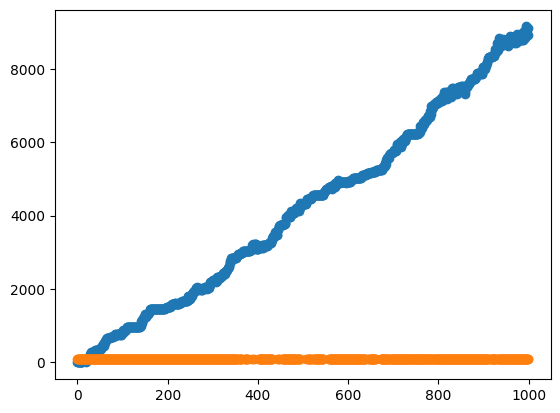

sharpe ratio: 3.520361861453182
Inventory: 140
cash: 83.83400000000938
PnL: 9118.134000000011
agent trades:
('buy', 99.45, 20)
('buy', 99.4, 20)
('sell', 100.7, 20)
('sell', 100.8, 20)
('buy', 99.21, 20)
('buy', 99.2, 20)
('sell', 100.8, 20)
('sell', 100.9, 20)
('buy', 99.35, 20)
('buy', 99.12, 20)
('sell', 100.92, 20)
('buy', 99.34, 20)
('sell', 100.93, 20)
('buy', 99.18, 20)
('sell', 101.02, 20)
('buy', 99.1, 20)
('sell', 101.12, 20)
('sell', 101.19, 20)
('buy', 99.44, 20)
('sell', 100.89, 20)
('buy', 99.44, 20)
('buy', 99.11, 20)
('sell', 100.89, 20)
('buy', 98.96, 20)
('sell', 101.23, 20)
('sell', 101.24, 20)
('buy', 99.36, 20)
('buy', 99.22, 20)
('buy', 99.2, 20)
('sell', 101.24, 20)
('buy', 99.2, 20)
('sell', 101.24, 20)
('buy', 99.13, 20)
('sell', 101.28, 20)
('buy', 99.24, 20)
('sell', 101.1, 20)
('sell', 101.1, 20)
('sell', 101.25, 20)
('buy', 99.29, 20)
('sell', 101.08, 20)
('buy', 99.16, 20)
('buy', 99.13, 20)
('sell', 100.99, 20)
('sell', 101.19, 20)
('buy', 99.49, 20)
('bu

In [119]:
import random
import matplotlib.pyplot as plt
import numpy as np

inventory = 0
initial_capital = 5000
cash = initial_capital
agent_trades = []
transaction_fees = 0.01

def agent_action(order_type, agent_size):

    global inventory, cash, initial_capital


    if order_type == 'buy' and cash>= agent_size * last_price * (1 + transaction_fees):
        market_order(agent_size, 'sell')
        inventory += agent_size
        cash -= agent_size * last_price * (1 - transaction_fees)
        agent_trades.append(('buy', last_price, agent_size))

    elif order_type == 'sell' and inventory >= agent_size:
        market_order(agent_size, 'buy')
        inventory -= agent_size
        cash += agent_size * last_price * (1 + transaction_fees)
        agent_trades.append(('sell', last_price, agent_size))


def strat(threshold_buy, threshold_sell, strat_size):
    print(f"last price: {last_price}, buy threshold: {threshold_buy}, sell threshold: {threshold_sell}")
    if last_price < threshold_buy:
        agent_action('buy', strat_size)

    elif last_price > threshold_sell:
        agent_action('sell',strat_size)

def PnL():
    port_value = cash + inventory * last_price
    diff = port_value - initial_capital
    return diff


def portfolio():
    print('Inventory:',inventory)
    print ('cash:', cash)
    print ('PnL:', PnL())

def metrics(porfolio_values, agent_trades):

    returns = []
    for i in range(1, len(porfolio_values)):
        back = (porfolio_values[i]-porfolio_values[i-1]/porfolio_values[i-1])
        returns.append(back)

    avg_return = np.mean(returns)
    std_return = np.std(returns)

    sharpe = avg_return / std_return if std_return != 0 else 0

    print('sharpe ratio:',sharpe)
    

def sim_orders():

    global PnLs

    for i in range (5):
        limit_order(99.5-(i*0.1), 50, 'buy')
        limit_order(100.5+(i*0.1), 50, 'sell')

    midprices = []

    PnLs = []

    portfolio_values = []

    num_orders = 1000

    ran_size = 50

    for o in range (num_orders):
        action = random.choice(['limit_buy','limit_sell','market_buy','market_sell'])

        if action == 'limit_buy':
            val = round(random.uniform(98.5, 100),2)
            limit_order(val, ran_size, 'buy')
            print(f'limit buy at {val}')

        elif action == 'limit_sell':
            val = round(random.uniform(100, 101.5),2)
            limit_order(val, ran_size, 'sell')
            print(f'limit sell at {val}')

        elif action == 'market_buy':
            market_order(ran_size, 'buy')
            print('market buy')

        elif action == 'market_sell':
            market_order(ran_size, 'sell')
            print('market sell')

        print('midprice:', get_mid_price(bids, asks))

        print('PnL:', PnL())

        midprices.append(get_mid_price(bids, asks))

        PnLs.append(PnL())

        portfolio_values.append(cash + inventory * last_price)
        


        strat(99.5,100.5, 20)

        
    plt.plot(PnLs, marker = 'o')
    plt.plot(midprices,marker = 'o')
   
    
    plt.show()

    metrics(portfolio_values, agent_trades)



sim_orders()
portfolio()



print('agent trades:')
for t in agent_trades:
    print(t)



    